<a href="https://www.kaggle.com/code/shivamgarg1999/fraud-detection-using-svm-rbf?scriptVersionId=106150446" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [3]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
X = data.columns.drop('Class')
y = 'Class'

array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>,
        <AxesSubplot:title={'center':'V11'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>,
        <AxesSubplot:title={'center':'V

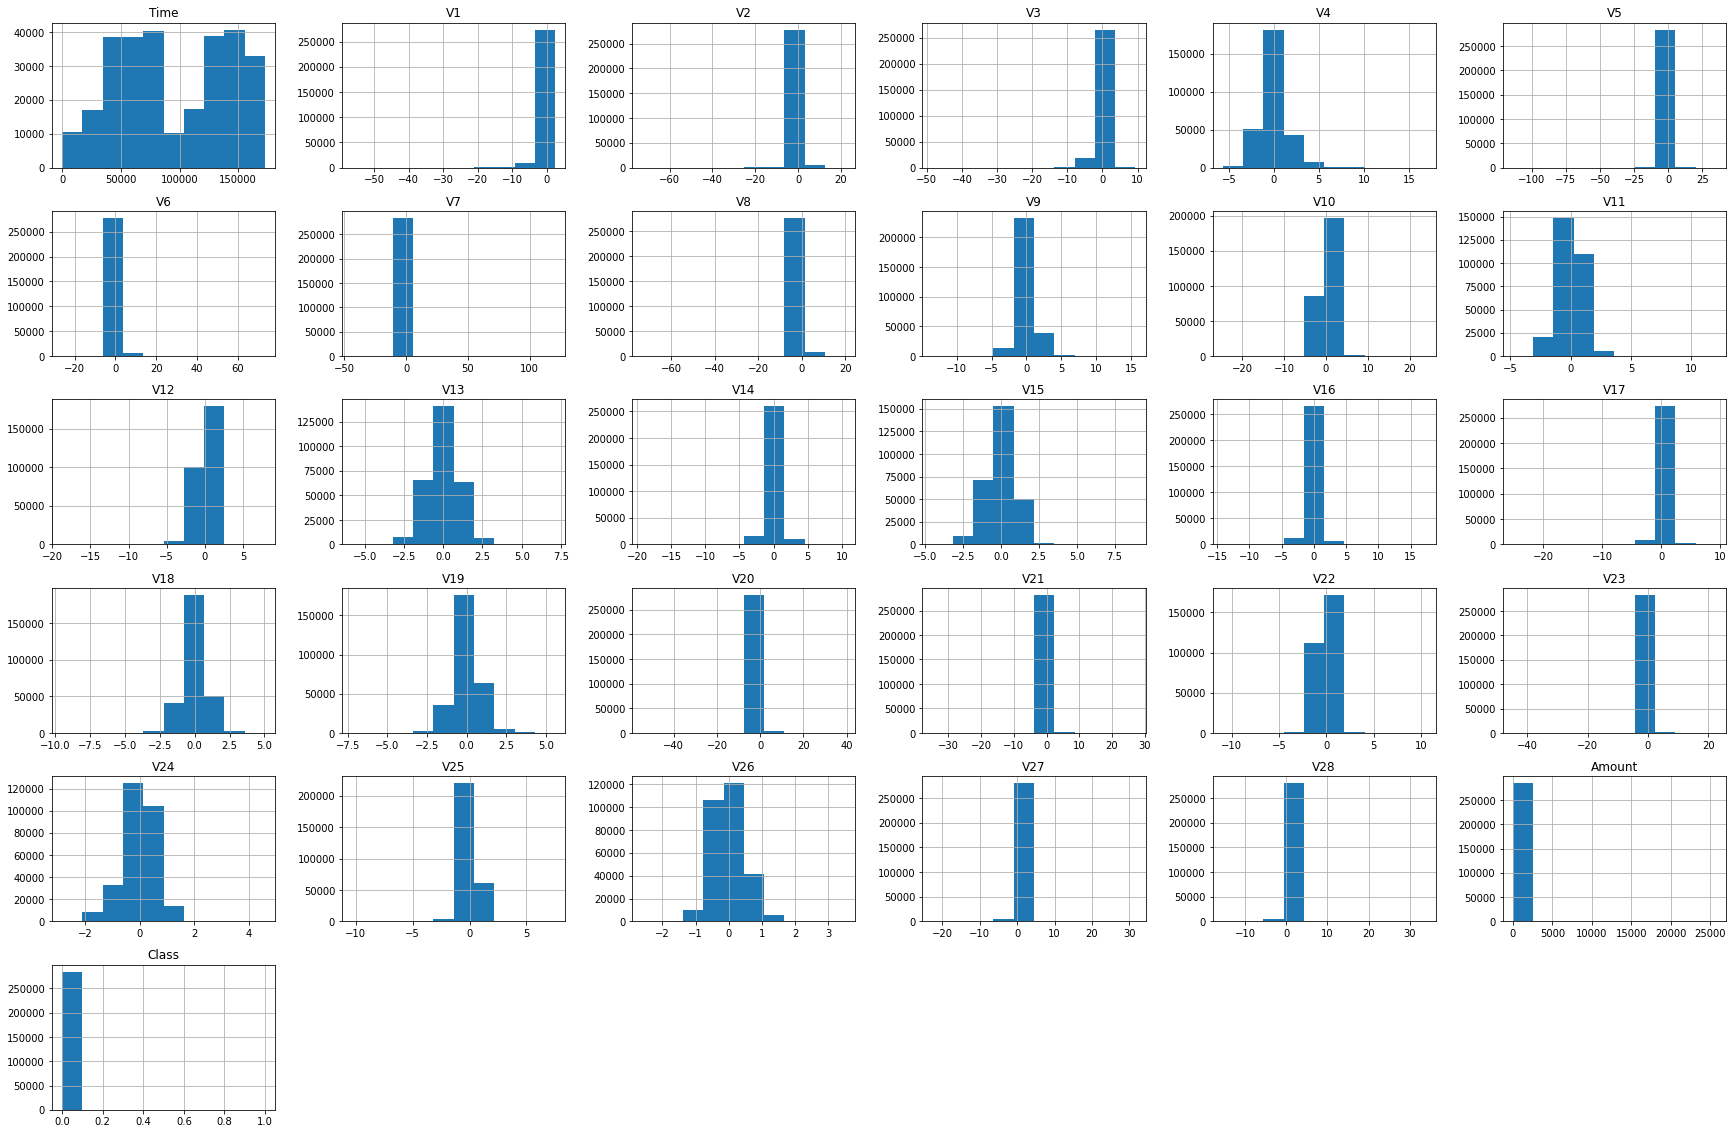

In [7]:
data.hist(figsize = (30,20))

# Class Exploration

In [8]:
class_counts = data['Class'].value_counts(normalize = True, dropna = False).mul(100).round(5).astype(str)+'%'
class_counts

0    99.82725%
1     0.17275%
Name: Class, dtype: object

There is a large data imbalance between the negative class (0 = not fraudulent) and positive class (1 = fraudulent) 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Class', ylabel='count'>

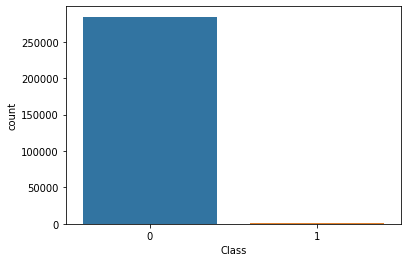

In [9]:
sns.countplot(data['Class'])

In [10]:
print("The ratio for positive to negative classes is:{}".format(len(data.loc[data['Class'] == 1])/len(data.loc[data['Class'] == 0])))

# We need to randomly resample so that we can get a 50%/0.5 ratio 

The ratio for positive to negative classes is:0.0017304750013189597


# Baseline Accuracy Using Dummy Classifier

In [11]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data[X],
    data[y],
    random_state = 42)

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)

y_dummy_predictions = dummy_majority.predict(X_test)
np.unique(y_dummy_predictions)

# Predicts only the majority class, in this case, this is 0 (not fraudulent)

array([0])

In [12]:
dummy_majority_score = dummy_majority.score(X_test, y_test)
print('When predicting "0" (Not Fraud) for every row in the original dataset, we achieve {:.5%} accuracy'.format(dummy_majority_score))
print('This is our baseline accuracy for the model.')

When predicting "0" (Not Fraud) for every row in the original dataset, we achieve 99.84130% accuracy
This is our baseline accuracy for the model.


# Resampling

We will need to randomly undersample to make the ratio higher

In [13]:
np.random.seed(42)

- Since we are resampling and want to avoid bias in our test data, we must _first_ use a train_test_split, and then apply our resampling and feature scaling.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data[X],
    data[y],
    random_state = 42)

In [15]:
# Cross validation?

In [16]:
def random_undersample(df, majority_class_value):
    
    majority_class_df = df.loc[df['Class'] == majority_class_value]
    minority_class_rows = len(df)-len(majority_class_df)
    
    print("There are {} records of the majority class, and {} records of the minority class".format(len(majority_class_df), minority_class_rows))
    
    print("To achieve a 50/50 split, we will randomly resample so that there are {} total records".format( ((minority_class_rows) * 2)) )
    
    
    randomly_sampled_majority_class_df = majority_class_df.sample(len(df)-len(majority_class_df)) 
    
    return randomly_sampled_majority_class_df

In [17]:
labelled_train_dataset = pd.concat([X_train, y_train], axis = 1)

rand_sample_maj_class_df = random_undersample(labelled_train_dataset, 0)

There are 213226 records of the majority class, and 379 records of the minority class
To achieve a 50/50 split, we will randomly resample so that there are 758 total records


### Undersampling vs Oversampling?

- Oversampling might reduce overfit due to higher sample sizes

- Can we use both? e.g. undersample majority clas _&_ oversample minority class

In [18]:
rand_sample_maj_class_df['Class'].value_counts()

0    379
Name: Class, dtype: int64

In [19]:
rand_sample_maj_class_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,...,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.0
mean,95479.646438,-0.004428,-0.081002,0.073934,0.054815,0.130793,-0.021092,0.022593,0.066089,0.082707,...,-0.021140,0.007402,-0.022632,0.059553,0.011978,-0.027210,0.000093,0.012223,84.185066,0.0
std,48151.665308,1.809295,1.384322,1.329594,1.506805,1.258368,1.307821,0.956405,0.719020,1.159562,...,0.396481,0.692545,0.541502,0.609581,0.536749,0.467677,0.460842,0.320744,174.485831,0.0
min,283.000000,-9.769940,-9.726317,-3.362827,-4.559620,-6.007319,-5.031631,-4.748279,-4.952799,-3.358206,...,-2.727765,-1.824200,-4.628091,-2.447988,-1.896534,-1.354413,-5.928907,-3.492635,0.000000,0.0
25%,54227.500000,-1.035250,-0.675101,-0.849235,-0.731383,-0.554629,-0.814571,-0.535495,-0.212481,-0.598233,...,-0.247201,-0.603562,-0.189319,-0.243002,-0.300114,-0.356043,-0.064172,-0.049672,8.295000,0.0
50%,87989.000000,0.037784,0.053624,0.206967,0.119610,0.057070,-0.240282,0.015036,0.017001,0.055669,...,-0.008771,0.034719,0.001029,0.066296,0.035279,-0.076226,0.002959,0.011698,25.280000,0.0
75%,140258.500000,1.398726,0.771921,1.085018,0.885256,0.666522,0.454178,0.585360,0.367433,0.683907,...,0.184403,0.525605,0.183360,0.506066,0.344850,0.231971,0.102588,0.091459,75.895000,0.0
max,172271.000000,2.294081,4.732941,3.068716,6.488703,7.727230,4.482273,3.441206,3.235032,5.385201,...,2.427958,1.897985,3.969710,1.205065,1.783880,1.548197,1.916157,3.572542,1823.200000,0.0


In [20]:
resampled_df = pd.concat([rand_sample_maj_class_df,labelled_train_dataset.loc[labelled_train_dataset['Class'] == 1]])

In [21]:
resampled_df['Class'].value_counts()

0    379
1    379
Name: Class, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Class', ylabel='count'>

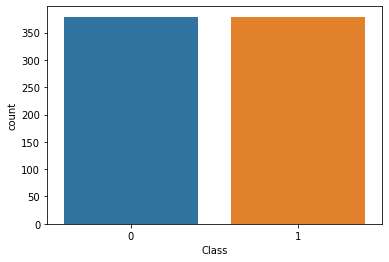

In [22]:
sns.countplot(resampled_df['Class'])

# Feature Scaling using Z-Score

From the context of the dataset:
> It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

Therefore, columns 'Amount' and 'Time' have not been standardized, as they are not the results of a PCA. 
Given this, we need to apply a z-score scaler to only these two columns.

array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>,
        <AxesSubplot:title={'center':'V11'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>,
        <AxesSubplot:title={'center':'V

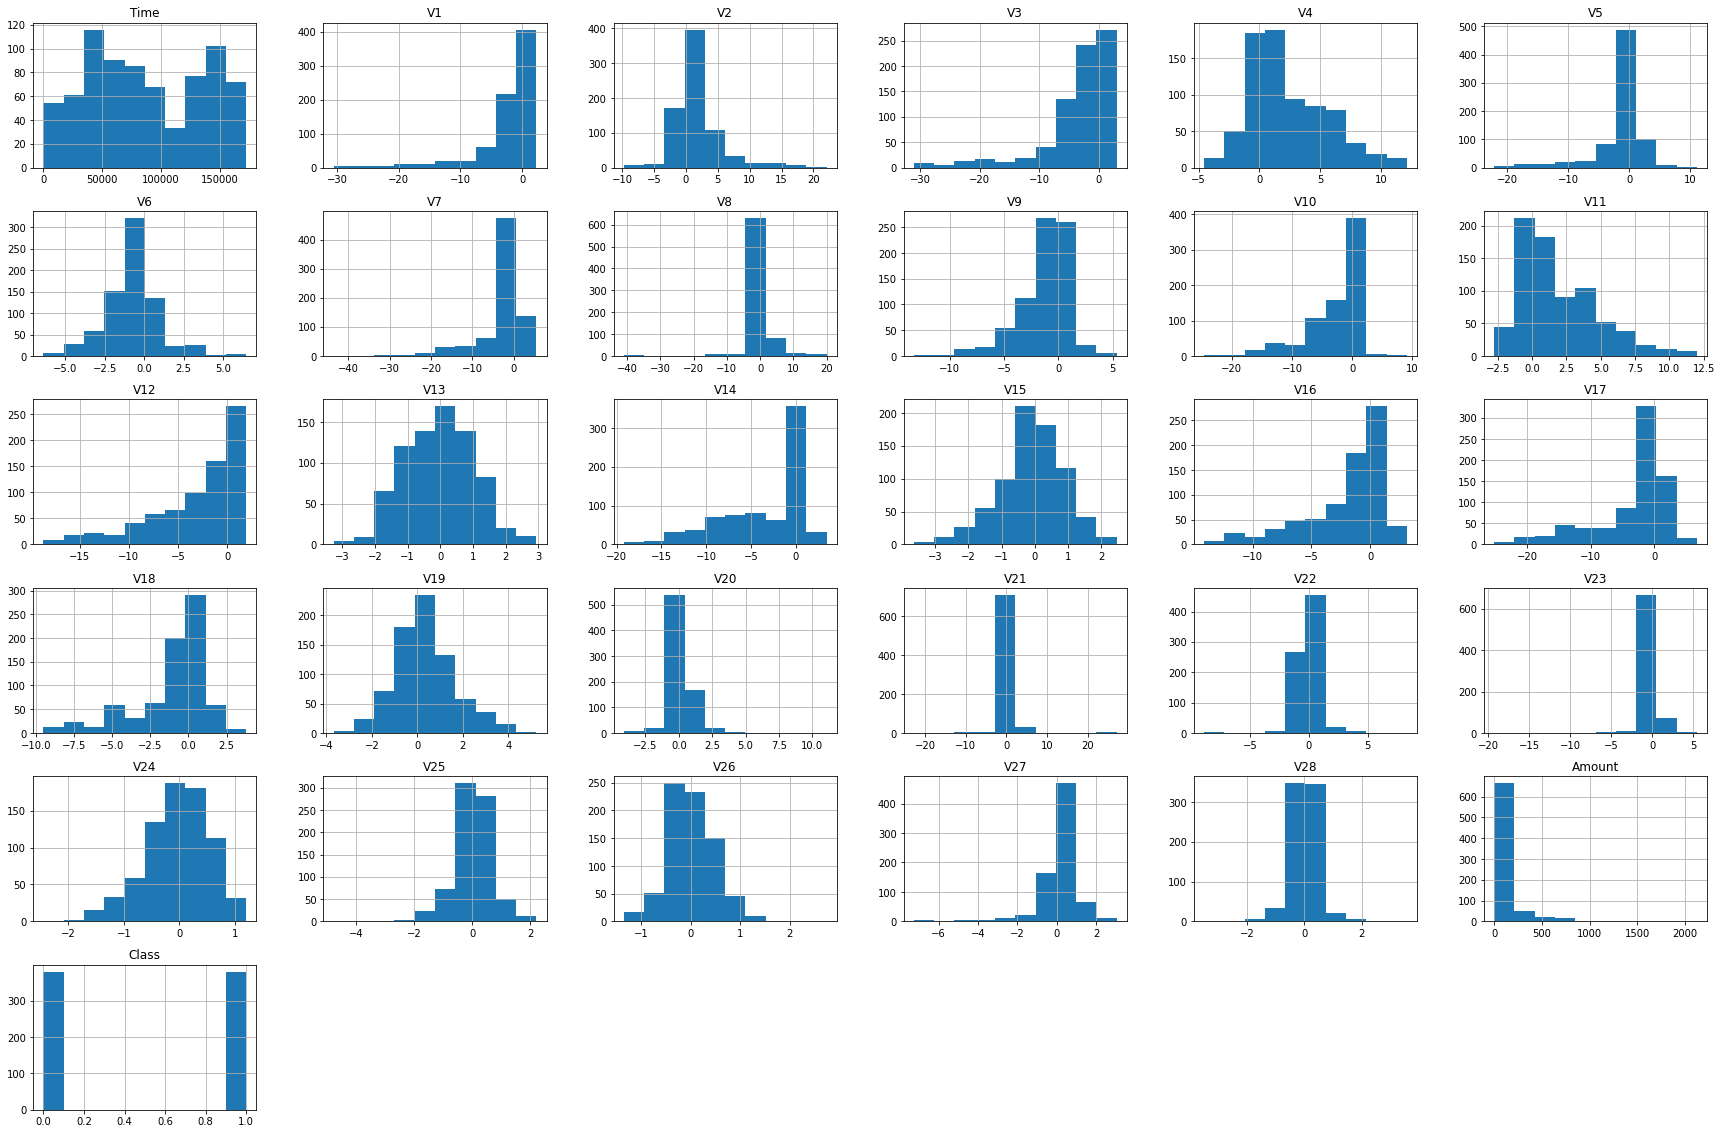

In [23]:
resampled_df.hist(figsize = (30,20))

In [24]:
from scipy.stats import zscore

normalized_df = resampled_df
normalized_df[['Time','Amount']] = normalized_df[['Time','Amount']].apply(zscore)
# normalized_df = normalized_df.assign(Class = resampled_df[y])

In [25]:
normalized_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>,
        <AxesSubplot:title={'center':'V11'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>,
        <AxesSubplot:title={'center':'V

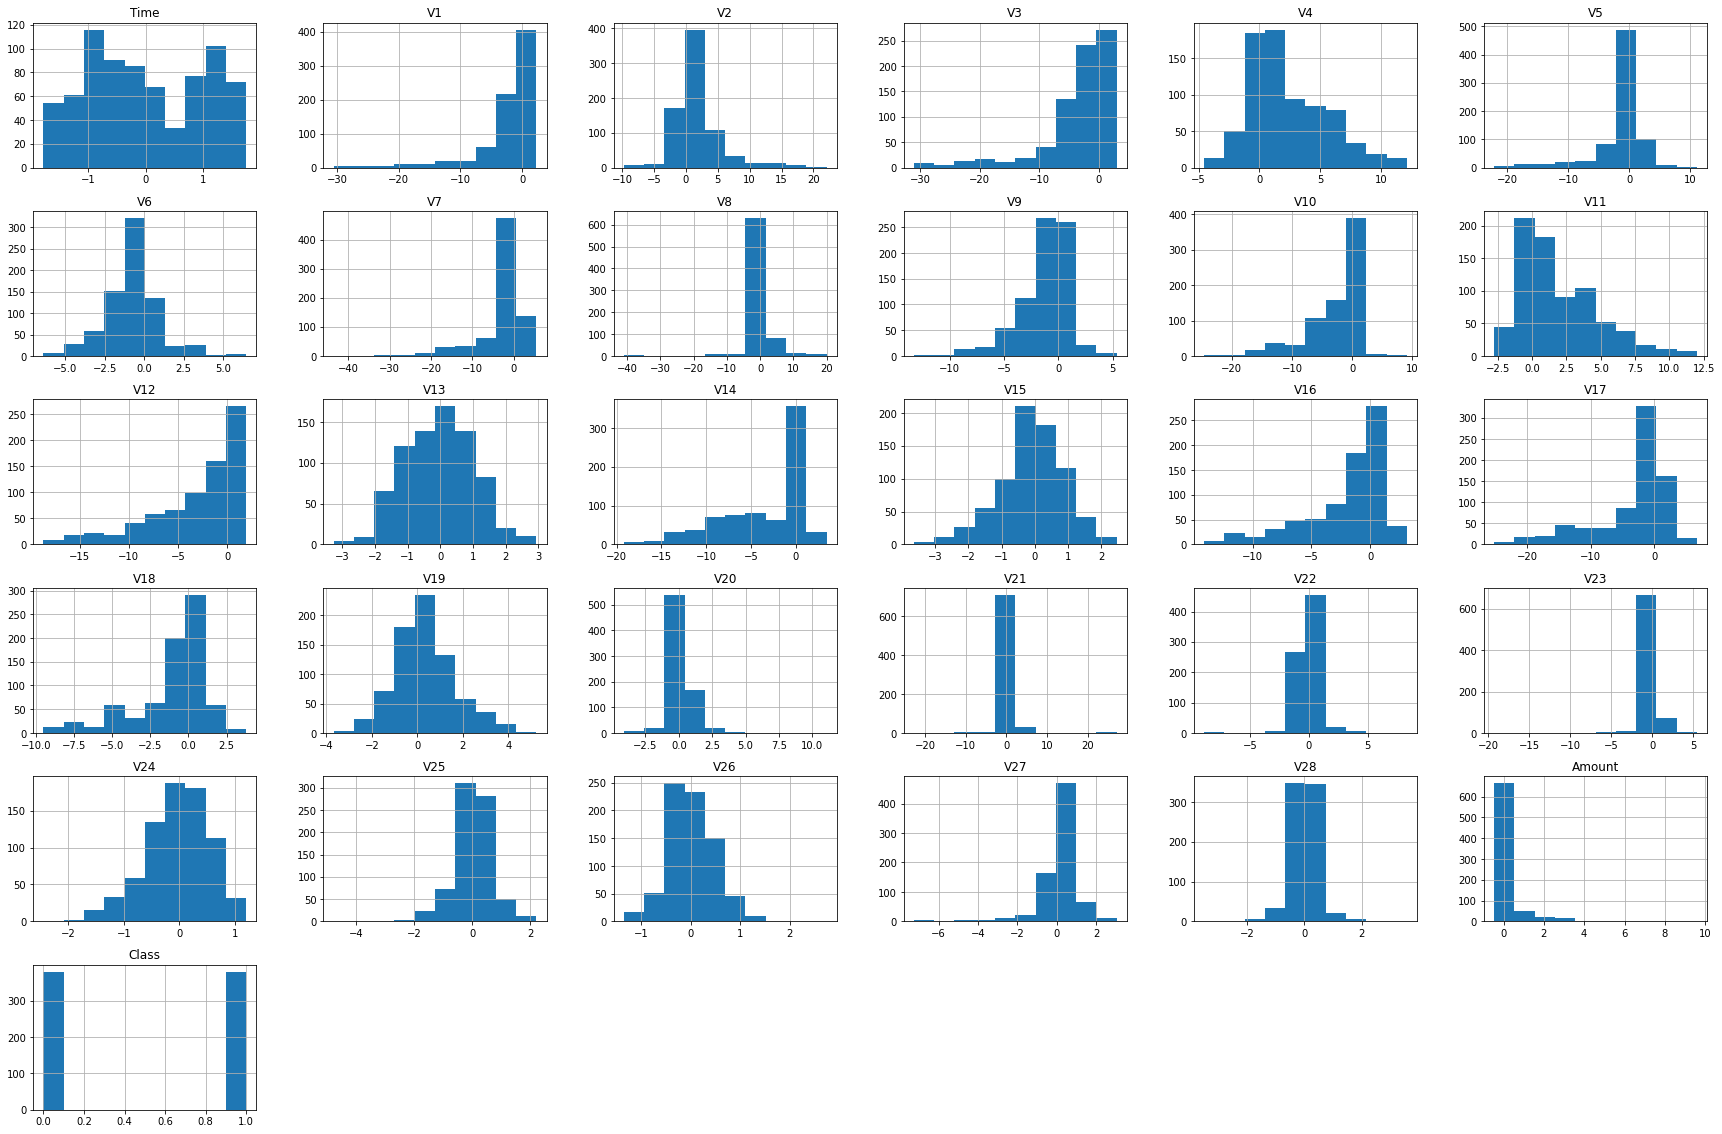

In [26]:
normalized_df.hist(figsize = (30,20))

Time and Amount are on much similar scales as a result of z-score transformation

In [27]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [28]:
normalized_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,758.00000,758.00000,758.00000,758.00000,758.00000,758.00000,758.00000,758.00000,758.00000,758.00000,...,758.00000,758.00000,758.00000,758.00000,758.00000,758.00000,758.00000,758.00000,758.00000,758.00000
mean,0.00000,-2.23653,1.72068,-3.38499,2.30440,-1.40793,-0.72143,-2.67355,0.37233,-1.22474,...,0.35791,0.00489,-0.05051,-0.02879,0.02126,0.02257,0.09912,0.04929,-0.00000,0.50000
std,1.00066,5.30202,3.54943,6.06039,3.18663,4.10454,1.70656,5.62036,4.47346,2.31199,...,2.56073,1.09662,1.21932,0.57408,0.69686,0.47369,1.00162,0.44122,1.00066,0.50033
min,-1.78003,-30.55238,-9.72632,-31.10368,-4.55962,-22.10553,-6.40627,-43.55724,-41.04426,-13.32015,...,-22.79760,-8.88702,-19.25433,-2.44799,-4.78161,-1.35441,-7.26348,-3.49264,-0.46469,0.00000
25%,-0.89673,-2.73773,-0.14909,-5.13453,-0.03813,-1.68190,-1.59462,-3.01811,-0.20316,-2.27406,...,-0.16692,-0.56071,-0.27162,-0.38033,-0.31200,-0.28825,-0.05609,-0.05613,-0.45858,0.00000
50%,-0.12345,-0.73397,0.93840,-1.35023,1.40103,-0.34609,-0.62209,-0.64434,0.16560,-0.69498,...,0.15122,0.04649,-0.03532,0.01433,0.06120,-0.01042,0.05222,0.03598,-0.37003,0.50000
75%,0.96590,1.04965,2.76151,0.35693,4.40252,0.57479,0.07112,0.23509,0.85424,0.25443,...,0.62078,0.56648,0.20205,0.38689,0.39410,0.33129,0.45134,0.21174,0.00857,1.00000
max,1.74402,2.29408,22.05773,3.06872,12.11467,11.09509,6.47411,5.43127,20.00721,5.38520,...,27.20284,8.31628,5.46623,1.20507,2.20821,2.74526,3.05236,3.57254,9.59719,1.00000


# Validation Curve for Gamma

In [29]:
from sklearn.svm import SVC
# from sklearn.sklearn.linear_model import  
from sklearn.model_selection import validation_curve

clf = SVC(kernel = 'rbf', C = 0.5, gamma = 0.1, random_state= 42)

# clf = SVC(kernel = 'linear', C = 0.5, gamma = 0.1, random_state= 42)


gamma_range = np.logspace(-4,1,30)

train_scores, test_scores = validation_curve(
clf,
normalized_df[X],
normalized_df[y],
param_name = 'gamma',
param_range = gamma_range,
scoring = 'accuracy')

train_scores, test_scores = np.array([np.mean(row) for row in train_scores]),np.array([np.mean(row) for row in test_scores])

print('Train scores:\n', train_scores,
      '\n'*2,
      'Test scores:\n', test_scores)

Train scores:
 [0.8944623  0.89808994 0.90699431 0.90897287 0.9106225  0.91490749
 0.92183437 0.92579314 0.92942242 0.93140044 0.93535866 0.93667879
 0.93931579 0.93964691 0.94030535 0.94195334 0.94689948 0.94888077
 0.9482207  0.99241359 1.         1.         1.         1.
 1.         1.         0.91532125 0.90741351 0.8140158  0.8140158 ] 

 Test scores:
 [0.89451028 0.89582607 0.90636982 0.9103259  0.9103259  0.91164169
 0.91691356 0.92351865 0.92352736 0.92747473 0.92879052 0.92879923
 0.92746602 0.92615023 0.92482572 0.91558906 0.90109794 0.8852649
 0.8297839  0.74928547 0.67944406 0.6992419  0.58972639 0.5421924
 0.53559603 0.53163994 0.52502614 0.52502614 0.52239456 0.52239456]


In [30]:
max_test_gamma = test_scores.argmax()

In [31]:
print("The best optimized model is when gamma is {:.3}, with a training set score of {:.5%}, and a test set score of {:.5%}".format(gamma_range[max_test_gamma],train_scores[max_test_gamma], test_scores[max_test_gamma]))

The best optimized model is when gamma is 0.00788, with a training set score of 93.66788%, and a test set score of 92.87992%


Text(0, 0.5, 'R2')

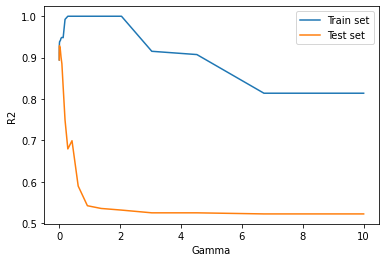

In [32]:
import matplotlib.pyplot as plt

plt.plot(gamma_range, train_scores, label = 'Train set' )
plt.plot(gamma_range, test_scores, label = 'Test set' )
plt.legend()
plt.xlabel("Gamma")
plt.ylabel('R2')

# Validation Curve for C

In [33]:
from sklearn.svm import SVC

from sklearn.model_selection import validation_curve

C_range = np.logspace(-4,1,30)

train_scores, test_scores = validation_curve(
clf,
normalized_df[X],
normalized_df[y],
param_name = 'C',
param_range = C_range,
scoring = 'accuracy')



train_scores, test_scores = np.array([np.mean(row) for row in train_scores]),np.array([np.mean(row) for row in test_scores])

print('Train scores:\n', train_scores,
      '\n'*2,
      'Test scores:\n', test_scores)

Train scores:
 [0.6204615  0.6204615  0.6204615  0.6204615  0.6204615  0.6204615
 0.6204615  0.6204615  0.6204615  0.6204615  0.6204615  0.6204615
 0.6204615  0.6204615  0.62474486 0.69492608 0.70118801 0.73911353
 0.7806667  0.8492755  0.8891834  0.92711436 0.98021161 0.98713741
 0.99439324 0.99769086 0.99967051 1.         1.         1.        ] 

 Test scores:
 [0.60920181 0.60920181 0.60920181 0.60920181 0.60920181 0.60920181
 0.60920181 0.60920181 0.60920181 0.60920181 0.60920181 0.60920181
 0.60920181 0.60920181 0.60920181 0.67277797 0.68069885 0.7216016
 0.74535552 0.79415301 0.83509934 0.86675671 0.88524747 0.89186999
 0.89715929 0.897168   0.89453642 0.89585221 0.89585221 0.89585221]


In [34]:
print("The best optimized model is when C is {:.3}, with a training set score of {:.5%}, and a test set score of {:.5%}".format(C_range[test_scores.argmax()],train_scores[test_scores.argmax()], test_scores[test_scores.argmax()]))

The best optimized model is when C is 2.04, with a training set score of 99.76909%, and a test set score of 89.71680%


Text(0, 0.5, 'R2')

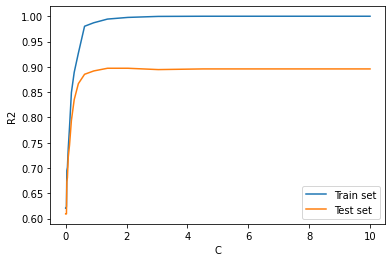

In [35]:
import matplotlib.pyplot as plt

plt.plot(C_range, train_scores, label = 'Train set')
plt.plot(C_range, test_scores, label = 'Test set')
plt.legend()
plt.xlabel("C")
plt.ylabel('R2')

# Finding the best combination of C and Gamma

In [36]:
X_test_scaled = X_test
X_test_scaled[['Amount', 'Time']] = X_test[['Amount', 'Time']].apply(zscore)

In [37]:
train_scores =[]
test_scores = []

for this_gamma in [0.1, 1,5]:
    for this_C in [0.1, 1,5]:
        clf = SVC(kernel = 'rbf', gamma = this_gamma, C = this_C, random_state = 42)
        clf.fit(normalized_df[X], normalized_df[y])
        train_scores.append([this_gamma, this_C, clf.score(normalized_df[X], normalized_df[y])])
        test_scores.append([this_gamma, this_C, clf.score(X_test_scaled, y_test)])
        

In [38]:
train_scores

[[0.1, 0.1, 0.7691292875989446],
 [0.1, 1, 0.9868073878627969],
 [0.1, 5, 1.0],
 [1, 0.1, 0.6187335092348285],
 [1, 1, 1.0],
 [1, 5, 1.0],
 [5, 0.1, 0.5329815303430079],
 [5, 1, 1.0],
 [5, 5, 1.0]]

In [39]:
test_scores

[[0.1, 0.1, 0.5778489368276172],
 [0.1, 1, 0.8628971096317519],
 [0.1, 5, 0.8539366871717087],
 [1, 0.1, 0.9984550995758547],
 [1, 1, 0.9916715822589253],
 [1, 5, 0.9899300581444341],
 [5, 0.1, 0.9984550995758547],
 [5, 1, 0.9981601640403359],
 [5, 5, 0.9980056739979214]]

**This can be achieved using GridSearch**

# Training an SVC Model

In [40]:
X_test_scaled = X_test
X_test_scaled[['Amount', 'Time']] = X_test[['Amount', 'Time']].apply(zscore)
# Applying z-score transformation to Test set columns

In [41]:
from sklearn.svm import SVC

clf = SVC(kernel = 'rbf', C = 0.005, gamma = 'scale', random_state= 42)
clf.fit(normalized_df[X], normalized_df[y])
svc_predictions = clf.predict(X_test)


print("Train accuracy of {:.7%}".format(clf.score(normalized_df[X], normalized_df[y])))
print("Test accuracy of {:.7%}".format(clf.score(X_test_scaled, y_test)))

Train accuracy of 83.6411609%
Test accuracy of 99.6474818%


# Confusion Matrix

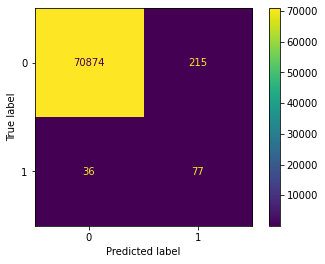

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# clf_confusion = confusion_matrix(y_test, svc_predictions)

clf_plot = ConfusionMatrixDisplay.from_estimator(
clf, X_test_scaled, y_test)

# Why Accuracy is not a good metric here...

- As seen with the dummy classifier, guessing '0'/Negative Class/Not Fraud for _all_ rows still gives us approx. 98% accuracy.
- This is due to the huge imbalance (since naturally, there are only a few positive classes in the dataset).
- A better metric for this kind of issue would be Sensitivity-Specificity/Precision-Recall metrics
- See: https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

In [43]:
from sklearn.metrics import precision_score

pres_score = precision_score(y_test, svc_predictions)
print('The SVC model has a precision score of {:5%}'.format(pres_score))

The SVC model has a precision score of 26.369863%


# Optimizing Gamma and C based on Precision (instead of Accuracy)

In [44]:
# from sklearn.svm import SVC

# from sklearn.model_selection import validation_curve

# C_range = np.logspace(-4,1,30)

# train_scores, test_scores = validation_curve(
# clf,
# normalized_df[X],
# normalized_df[y],
# param_name = 'gamma',
# param_range = gamma_range,
# scoring = 'precision')



# train_scores, test_scores = np.array([np.mean(row) for row in train_scores]),np.array([np.mean(row) for row in test_scores])

# print('Train scores:\n', train_scores,
#       '\n'*2,
#       'Test scores:\n', test_scores)

In [45]:
# import matplotlib.pyplot as plt


# plt.plot(gamma_range, train_scores, label = 'Train set')
# plt.plot(gamma_range, test_scores, label = 'Test set' )
# plt.legend()
# plt.xlabel("C")
# plt.ylabel('Precision')

In [46]:
# train_scores =[]
# test_scores = []

# for this_gamma in [0.1, 1,5]:
#     for this_C in [0.1, 1,5]:
#         clf = SVC(kernel = 'rbf', gamma = this_gamma, C = this_C, random_state = 42)
#         clf.fit(normalized_df[X], normalized_df[y])
        
        
#         train_scores.append([this_gamma, this_C, precision_score(normalized_df[y], clf.predict(normalized_df[X]))])
#         test_scores.append([this_gamma, this_C, precision_score(y_test, clf.predict(X_test_scaled[X]))])

# Trraining a Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

dt = clf.fit(normalized_df[X],normalized_df[y])
dt_pred = dt.predict(X_test_scaled)
# confusion_dt = confusion_matrix(y_test, dt_pred)
# confusion_dt

[Text(0.3507486979166667, 0.9583333333333334, 'X[14] <= -2.275\ngini = 0.5\nsamples = 758\nvalue = [379, 379]'),
 Text(0.10416666666666667, 0.875, 'X[9] <= 3.443\ngini = 0.041\nsamples = 331\nvalue = [7, 324]'),
 Text(0.08333333333333333, 0.7916666666666666, 'X[12] <= -0.039\ngini = 0.024\nsamples = 328\nvalue = [4, 324]'),
 Text(0.041666666666666664, 0.7083333333333334, 'X[12] <= -0.673\ngini = 0.006\nsamples = 318\nvalue = [1, 317]'),
 Text(0.020833333333333332, 0.625, 'gini = 0.0\nsamples = 310\nvalue = [0, 310]'),
 Text(0.0625, 0.625, 'X[7] <= 1.198\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.041666666666666664, 0.5416666666666666, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.08333333333333333, 0.5416666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.125, 0.7083333333333334, 'X[25] <= -0.234\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.10416666666666667, 0.625, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.14583333333333334, 0.625, 'gi

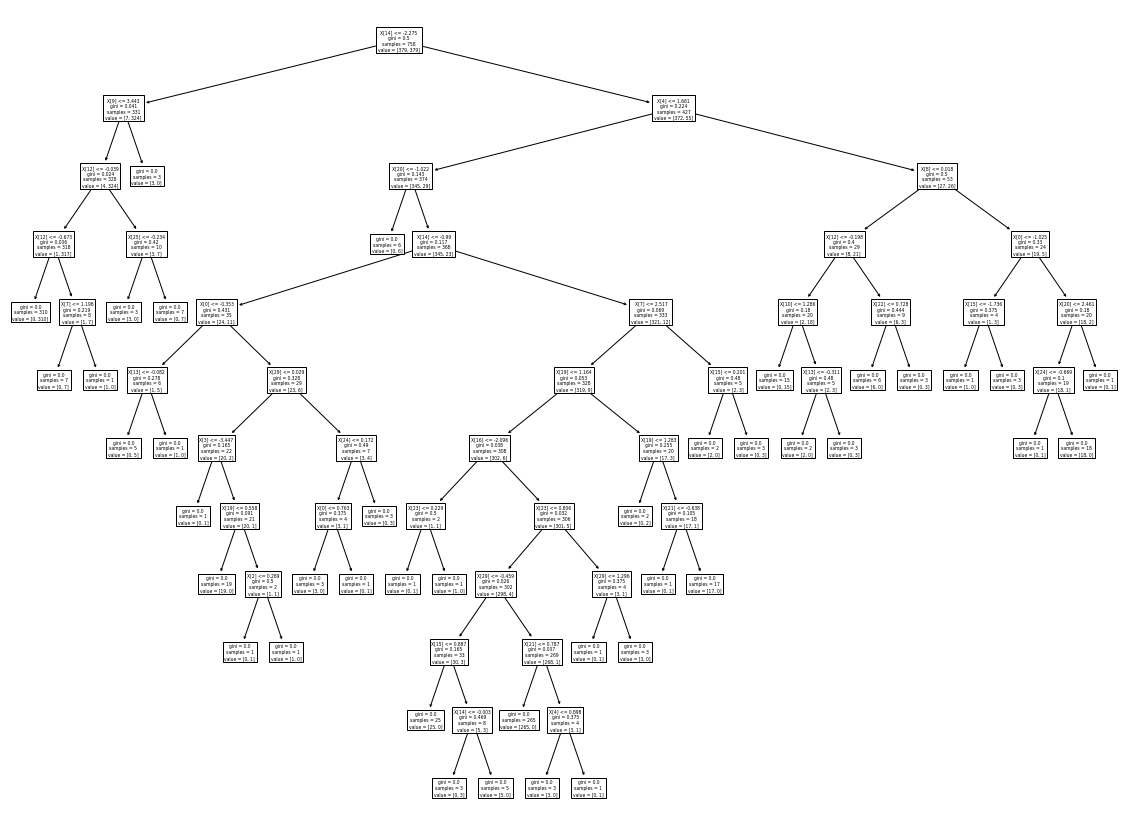

In [48]:
from sklearn import tree

plt.figure(figsize=(20,15))
tree.plot_tree(clf)

In [49]:
dt.score(X_test_scaled, y_test)

0.8889216595039465

# Principal Component Analysis

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normalized_df[X])
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [51]:
principalDf.index = normalized_df.index
principalDf['Class'] = normalized_df[y].to_list()

In [52]:
principalDf.reset_index(drop = True, inplace = True)

In [53]:
principalDf.iloc[:,0:2]

,principal component 1,principal component 2
0,-9.27187,1.00576
1,-9.37207,0.87426
2,-8.23856,3.40718
3,-9.30093,1.07006
4,-9.14486,1.06885
...,...,...
753,31.01943,-9.66617
754,1.34033,-1.15104
755,-8.46386,-0.17260
756,14.17256,-4.90253


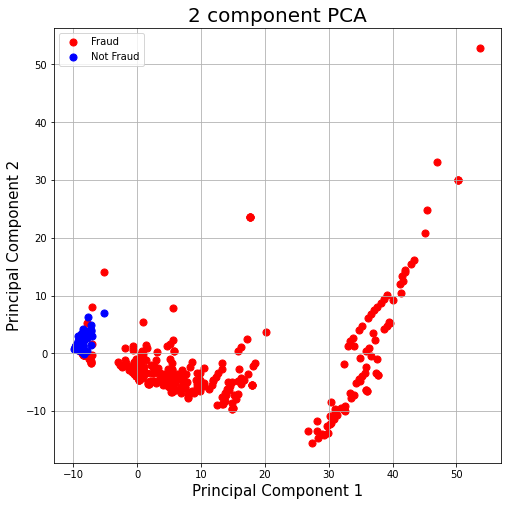

In [54]:
%matplotlib inline

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r','b']

for target, color in zip(targets,colors):
    indicesToKeep = principalDf['Class'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['Fraud', 'Not Fraud'])
ax.grid()

In [55]:
## Univariate F-value (feature ranking) test